# ML Week 4 - Combining EDA and K-Means
##### Tbd

### Datset
We will be using a ceramics dataset from Peru.

The dataset can be downloaded here:
https://zenodo.org/records/13227959

The associated publication is:

Glascock et al. 2019, https://doi.org/10.1017/laq.2019.85

## Importing Packages

In [33]:
import pandas as pd
import seaborn as sns

## Import Data and Examine DataFrame
##### Let's look at the first few rows and see what we have

In [34]:
# Let's read in our data
filepath = "./"  # This can help if the file is in a different folder. Here we just use "./" which means "the file is in this folder"
filename = "Matsumoto_GMP001-225.csv"

df_raw = pd.read_csv(filepath + filename)

df_raw.head()

,ANID,Alt_ID,Standard,Investigator,Source,Region,Country,State/Province,County/District,Subregion,...,Zr,Al,Ba,Ca,Dy,K,Mn,Na,Ti,V
0,GMP001,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,134.239,85528.0,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7
1,GMP002,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,128.146,84291.0,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0
2,GMP003,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,154.268,79324.6,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9
3,GMP004,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,153.187,91631.5,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1
4,GMP005,NaN,SRM-1633b,"Matsumoto, Go",Sicán Archaeological Project,South America,Peru,Lambayeque,Ferreñafe,La Leche Valley,...,120.762,94324.8,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8


## Taking a look at the column names

In [35]:
# Let's see our columns
columns = df_raw.columns
for i in range(len(columns)):
    print(str(i) + ' ' + columns[i])

0 ANID
1 Alt_ID
2 Standard
3 Investigator
4 Source
5 Region
6 Country
7 State/Province
8 County/District
9 Subregion
10 Site_Name
11 Site_Number
12 Material
13 Ware
14 Ceramic_Type
15 Form
16 Exterior_Decoration
17 Interior_Decoration
18 Paste_Color
19 Major_Temper
20 Minor_Temper
21 Culture
22 Context
23 Provenience
24 Era/Period
25 Date_Range
26 Picture
27 Comments
28 Notes
29 Chemgrp
30 Spare_ANID
31 Long_RDF
32 Long_Date
33 Short_RDF
34 Short_Date
35 As
36 La
37 Lu
38 Nd
39 Sm
40 U
41 Yb
42 Ce
43 Co
44 Cr
45 Cs
46 Eu
47 Fe
48 Hf
49 Ni
50 Rb
51 Sb
52 Sc
53 Sr
54 Ta
55 Tb
56 Th
57 Zn
58 Zr
59 Al
60 Ba
61 Ca
62 Dy
63 K
64 Mn
65 Na
66 Ti
67 V


## Dropping columns we don't need

In [36]:
# Let's look at the unique items for the columns

for column in df_raw.columns:
    print('-------')
    print(column)
    print("Set size: " + str(len(df_raw[column].unique())))
    print(df_raw[column].unique())

-------
ANID
Set size: 225
['GMP001' 'GMP002' 'GMP003' 'GMP004' 'GMP005' 'GMP006' 'GMP007' 'GMP008'
 'GMP009' 'GMP010' 'GMP011' 'GMP012' 'GMP013' 'GMP014' 'GMP015' 'GMP016'
 'GMP017' 'GMP018' 'GMP019' 'GMP020' 'GMP021' 'GMP022' 'GMP023' 'GMP024'
 'GMP025' 'GMP026' 'GMP027' 'GMP028' 'GMP029' 'GMP030' 'GMP031' 'GMP032'
 'GMP033' 'GMP034' 'GMP035' 'GMP036' 'GMP037' 'GMP038' 'GMP039' 'GMP040'
 'GMP041' 'GMP042' 'GMP043' 'GMP044' 'GMP045' 'GMP046' 'GMP047' 'GMP048'
 'GMP049' 'GMP050' 'GMP051' 'GMP052' 'GMP053' 'GMP054' 'GMP055' 'GMP056'
 'GMP057' 'GMP058' 'GMP059' 'GMP060' 'GMP061' 'GMP062' 'GMP063' 'GMP064'
 'GMP065' 'GMP066' 'GMP067' 'GMP068' 'GMP069' 'GMP070' 'GMP071' 'GMP072'
 'GMP073' 'GMP074' 'GMP075' 'GMP076' 'GMP077' 'GMP078' 'GMP079' 'GMP080'
 'GMP081' 'GMP082' 'GMP083' 'GMP084' 'GMP085' 'GMP086' 'GMP087' 'GMP088'
 'GMP089' 'GMP090' 'GMP091' 'GMP092' 'GMP093' 'GMP094' 'GMP095' 'GMP096'
 'GMP097' 'GMP098' 'GMP099' 'GMP100' 'GMP101' 'GMP102' 'GMP103' 'GMP104'
 'GMP105' 'GMP106' 'GMP1

In [37]:
# So many of the columns have only a single value for all entries. This is useless for us as it has no predictive power. We can drop them

for column in df_raw.columns:
    if len(df_raw[column].unique()) == 1:
        df_raw = df_raw.drop(columns=column)

In [38]:
df_raw.head()

,ANID,Ceramic_Type,Interior_Decoration,Spare_ANID,Long_RDF,Long_Date,Short_RDF,Short_Date,As,La,...,Zr,Al,Ba,Ca,Dy,K,Mn,Na,Ti,V
0,GMP001,Plainware,plain,GMP001,AMB2,04/13/14,ADF1-S,04/11/14,13.808,31.011,...,134.239,85528.0,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7
1,GMP002,Plainware,plain,GMP002,AMB2,04/13/14,ADF1-S,04/11/14,15.712,28.909,...,128.146,84291.0,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0
2,GMP003,Plainware,plain,GMP003,AMB2,04/13/14,ADF1-S,04/11/14,20.534,25.983,...,154.268,79324.6,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9
3,GMP004,Plainware,plain,GMP004,AMB2,04/13/14,ADF1-S,04/11/14,8.339,27.654,...,153.187,91631.5,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1
4,GMP005,Plainware,plain,GMP005,AMB2,04/13/14,ADF1-S,04/11/14,32.849,24.667,...,120.762,94324.8,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8


In [39]:
# Let's see what we have now

for column in df_raw.columns:
    print('-------')
    print(column)
    print("Set size: " + str(len(df_raw[column].unique())))
    print(df_raw[column].unique())

-------
ANID
Set size: 225
['GMP001' 'GMP002' 'GMP003' 'GMP004' 'GMP005' 'GMP006' 'GMP007' 'GMP008'
 'GMP009' 'GMP010' 'GMP011' 'GMP012' 'GMP013' 'GMP014' 'GMP015' 'GMP016'
 'GMP017' 'GMP018' 'GMP019' 'GMP020' 'GMP021' 'GMP022' 'GMP023' 'GMP024'
 'GMP025' 'GMP026' 'GMP027' 'GMP028' 'GMP029' 'GMP030' 'GMP031' 'GMP032'
 'GMP033' 'GMP034' 'GMP035' 'GMP036' 'GMP037' 'GMP038' 'GMP039' 'GMP040'
 'GMP041' 'GMP042' 'GMP043' 'GMP044' 'GMP045' 'GMP046' 'GMP047' 'GMP048'
 'GMP049' 'GMP050' 'GMP051' 'GMP052' 'GMP053' 'GMP054' 'GMP055' 'GMP056'
 'GMP057' 'GMP058' 'GMP059' 'GMP060' 'GMP061' 'GMP062' 'GMP063' 'GMP064'
 'GMP065' 'GMP066' 'GMP067' 'GMP068' 'GMP069' 'GMP070' 'GMP071' 'GMP072'
 'GMP073' 'GMP074' 'GMP075' 'GMP076' 'GMP077' 'GMP078' 'GMP079' 'GMP080'
 'GMP081' 'GMP082' 'GMP083' 'GMP084' 'GMP085' 'GMP086' 'GMP087' 'GMP088'
 'GMP089' 'GMP090' 'GMP091' 'GMP092' 'GMP093' 'GMP094' 'GMP095' 'GMP096'
 'GMP097' 'GMP098' 'GMP099' 'GMP100' 'GMP101' 'GMP102' 'GMP103' 'GMP104'
 'GMP105' 'GMP106' 'GMP1

In [40]:
# A lot of these are just cataloguing or date info. We can throw them out.

df_raw = df_raw.drop(columns=['ANID','Spare_ANID','Long_RDF','Long_Date','Short_RDF','Short_Date'])

In [41]:
df_raw.head()

,Ceramic_Type,Interior_Decoration,As,La,Lu,Nd,Sm,U,Yb,Ce,...,Zr,Al,Ba,Ca,Dy,K,Mn,Na,Ti,V
0,Plainware,plain,13.808,31.011,0.384,25.331,6.101,4.202,2.785,62.092,...,134.239,85528.0,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7
1,Plainware,plain,15.712,28.909,0.384,40.023,6.270,3.455,2.535,59.037,...,128.146,84291.0,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0
2,Plainware,plain,20.534,25.983,0.369,27.267,5.455,3.899,2.667,53.925,...,154.268,79324.6,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9
3,Plainware,plain,8.339,27.654,0.377,23.345,5.651,4.677,2.774,56.745,...,153.187,91631.5,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1
4,Plainware,plain,32.849,24.667,0.409,21.267,5.763,4.400,2.564,51.557,...,120.762,94324.8,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8


In [42]:
# Let's check what percentage of the columns are empty (NaN values) using the "isna" method

length = len(df_raw)

for column in df_raw.columns:
    percent_NaN = df_raw[column].isna().sum()/length*100
    print('-------')
    print(column)
    print(percent_NaN)

-------
Ceramic_Type
0.0
-------
Interior_Decoration
0.0
-------
As
0.0
-------
La
0.0
-------
Lu
0.0
-------
Nd
0.0
-------
Sm
0.0
-------
U
0.0
-------
Yb
0.0
-------
Ce
0.0
-------
Co
0.0
-------
Cr
0.0
-------
Cs
0.0
-------
Eu
0.0
-------
Fe
0.0
-------
Hf
0.0
-------
Ni
0.0
-------
Rb
0.0
-------
Sb
0.0
-------
Sc
0.0
-------
Sr
0.0
-------
Ta
0.0
-------
Tb
0.0
-------
Th
0.0
-------
Zn
0.0
-------
Zr
0.0
-------
Al
0.0
-------
Ba
0.0
-------
Ca
0.0
-------
Dy
0.0
-------
K
0.0
-------
Mn
0.0
-------
Na
0.0
-------
Ti
0.0
-------
V
0.0


## How do we deal with string columns when using ML?

ML Systems can only handle numeric data. If we think a column could be interesting, but it contains tabular data, we have a few questions to ask:

* How many unique values are there in the column?

* Are the values somehow related to each other?

* Do the values represent an order?

## Case 1: Unrelated column values, and not too many unique values
#### Non-numeric and unrelated column values are called '**categorical**'. Here we use "one-hot encoding". We make a new column for each unique value, and assign 1 if that row is labelled as fitting into the data

In [ ]:
df_raw = pd.get_dummies(df_raw, columns=['Ceramic_Type'], dtype=int)

In [44]:
df_raw.head()

,Interior_Decoration,As,La,Lu,Nd,Sm,U,Yb,Ce,Co,...,Ba,Ca,Dy,K,Mn,Na,Ti,V,Ceramic_Type_Cajamarca Costeño (a.k.a. Sicán Painted Dish),Ceramic_Type_Plainware
0,plain,13.808,31.011,0.384,25.331,6.101,4.202,2.785,62.092,14.354,...,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7,0,1
1,plain,15.712,28.909,0.384,40.023,6.270,3.455,2.535,59.037,14.507,...,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0,0,1
2,plain,20.534,25.983,0.369,27.267,5.455,3.899,2.667,53.925,12.563,...,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9,0,1
3,plain,8.339,27.654,0.377,23.345,5.651,4.677,2.774,56.745,12.051,...,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1,0,1
4,plain,32.849,24.667,0.409,21.267,5.763,4.400,2.564,51.557,13.746,...,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8,0,1


## Case 2: Related column values
#### Related column values are called '**Ordinal**'

Examples:
* Wear: Low, Moderate, Severe
* Age: Early Kingdom, Middle Kingdom, Late Kingdom
* Property Value: none, cheap, moderate, expensive

#### To deal with these we need to assign values between 0 and 1. The exact assignment will be case dependant

In [ ]:
# Here, for the Interior_Decoration column, we set plain to be 0 and painted (which is the opposite of plain) to be 1
df_raw.loc[df_raw['Interior_Decoration'] == 'plain', 'Interior_Decoration'] = 0
df_raw.loc[df_raw['Interior_Decoration'] == 'semi-painted', 'Interior_Decoration'] = 0.5
df_raw.loc[df_raw['Interior_Decoration'] == 'painted', 'Interior_Decoration'] = 1

# Note: This is a bit contrived. In general this is more iportant for ordinal columns that have more than one entry, but here we actually have only 2, so it is basically the same as one-hot encoding. But I wanted to use a real dataset and this is the best I could find.

In [47]:
df_raw.head()

,Interior_Decoration,As,La,Lu,Nd,Sm,U,Yb,Ce,Co,...,Ba,Ca,Dy,K,Mn,Na,Ti,V,Ceramic_Type_Cajamarca Costeño (a.k.a. Sicán Painted Dish),Ceramic_Type_Plainware
0,0,13.808,31.011,0.384,25.331,6.101,4.202,2.785,62.092,14.354,...,504.3,14244.3,4.251,19868.5,879.8,11383.3,4860.9,117.7,0,1
1,0,15.712,28.909,0.384,40.023,6.270,3.455,2.535,59.037,14.507,...,491.0,14103.6,3.979,17577.7,937.6,10884.3,4471.7,119.0,0,1
2,0,20.534,25.983,0.369,27.267,5.455,3.899,2.667,53.925,12.563,...,557.5,13546.8,3.255,16001.5,710.9,17478.3,4139.0,120.9,0,1
3,0,8.339,27.654,0.377,23.345,5.651,4.677,2.774,56.745,12.051,...,547.1,16952.5,4.177,19046.2,744.6,12144.9,5602.5,121.1,0,1
4,0,32.849,24.667,0.409,21.267,5.763,4.400,2.564,51.557,13.746,...,533.4,10256.3,4.289,22621.7,685.9,19269.2,4518.5,133.8,0,1


## Case 3: Unrelated column values, with many unique values ("many" is case dependant)
##### Different solutions exist: Similar values can be grouped, the column can simply be dropped, or embedding vectors can be created for each value (we will visit the last step probably in next semester's cousre)
##### For now we won't worry about this case, but it could come up in one of your exam datasets

## Switching to NumPy
##### We now have a fully numeric dataset. Hooray! We can switch to NumPy

In [77]:
X = df_raw.to_numpy(dtype=float)

In [78]:
X

array([[  0.   ,  13.808,  31.011, ..., 117.7  ,   0.   ,   1.   ],
       [  0.   ,  15.712,  28.909, ..., 119.   ,   0.   ,   1.   ],
       [  0.   ,  20.534,  25.983, ..., 120.9  ,   0.   ,   1.   ],
       ...,
       [  0.   ,  22.993,  29.741, ..., 145.1  ,   0.   ,   1.   ],
       [  0.   ,  17.792,  35.496, ..., 123.1  ,   0.   ,   1.   ],
       [  1.   ,  11.884,  48.267, ..., 140.8  ,   1.   ,   0.   ]],
      shape=(225, 36))

<div>
<img src="Normalization.avif" width="500"/>
<img src="Standardization.avif" width="500"/>
</div>
Source: https://www.datacamp.com/tutorial/normalization-vs-standardization

In [50]:
import sklearn as sk

In [80]:
X = sk.preprocessing.StandardScaler().fit(X).transform(X)

In [81]:
from matplotlib import pyplot as plt

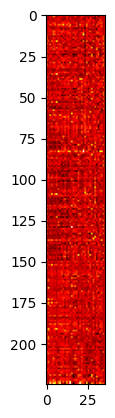

In [82]:
plt.imshow(X, cmap='hot')